# **EVA** TEXT CLASSIFIER

![img_ppal](https://www.innovacion-tecnologia.com/wp-content/uploads/2020/09/Historia-de-los-humanoides.jpg)

## *ÍNDICE* 
---
0. INTRODUCCIÓN
1. **MACHINE LEARNING**
    - 1.1. Librerias, constantes y carga de datos
    - 1.2. Creación y comparación de modelos
    - 1.3. Resultados/predicciones
    - 1.4. Observaciones
2. DEEP LEARNING
    - 2.1. Librerias, constantes y carga de datos
    - 2.2. Creación y comparación de modelos
    - 2.3. Resultados/predicciones
    - 2.4. Observaciones
---

# ***MACHINE LEARNING: NLP models training***

---

### Librerías

In [2]:
from utils.libreries import *
from utils.functions import *

### Definir constantes

In [3]:
REL_PATH = os.getcwd()
TRAIN_PATH = REL_PATH + '/data/raw/train.csv'
TEST_PATH = REL_PATH + '/data/raw/test.csv'
TRAIN_PROCESSED_PATH = REL_PATH + '/data/processed/train_processed.csv'

### Datasets

In [4]:
df_train = pd.read_csv(TRAIN_PATH)
df_train.head()

,train_idx,text,label,label_text
0,0,i really do recommend this to anyone in need o...,1,positive
1,1,very good every day camera fits nicely in the ...,1,positive
2,2,"but , dollar for dollar , this dvd player is p...",1,positive
3,3,i got this phone yesterday and didn ' t find a...,1,positive
4,4,1 ) price gb of storage,1,positive


In [5]:
df_train.head(20)

,train_idx,text,label,label_text
0,0,i really do recommend this to anyone in need o...,1,positive
1,1,very good every day camera fits nicely in the ...,1,positive
2,2,"but , dollar for dollar , this dvd player is p...",1,positive
3,3,i got this phone yesterday and didn ' t find a...,1,positive
4,4,1 ) price gb of storage,1,positive
5,5,one cabinet shop has been using one regularly ...,1,positive
6,6,i will say that the os that the phone runs doe...,0,negative
7,7,this model appears to be especially good,1,positive
8,8,i find that it is stable in my hands and its '...,1,positive
9,9,"the catch is that , while it plays movies just...",0,negative


In [6]:
ds_test = pd.read_csv(TEST_PATH)
ds_test.head()

,test_idx,text
0,0,fm receiver it has none
1,1,"the picture quality surprised me , when i firs..."
2,2,great video clip quality for a digital camera ...
3,3,creative did well on its rechargeable battery ...
4,4,i highly recommend this camera to anyone looki...


### Baseline de los modelos:


In [7]:
df_train['text'] = df_train['text'].apply(preprocess_text)
df_train['text']

0                 really recommend anyone need new player
1       good every day camera fit nicely pocket jean t...
2                  dollar dollar dvd player probably best
3                    got phone yesterday find problem yet
4                                      1 price gb storage
                              ...                        
3011    itunes find good window medium player computer...
3012          played feature yet camera easy use get used
3013    application lot application work well eventual...
3014                                    battery non issue
3015     fm tuner 5g storage removable disk great feature
Name: text, Length: 3016, dtype: object

In [8]:
plt.figure(figsize=(10,8))
plt.style.use('ggplot')

<Figure size 720x576 with 0 Axes>

<class 'list'>
Saved
--------------------
LogisticRegression()
--------------------



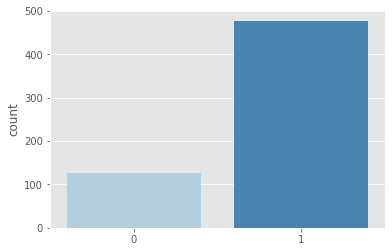

Saved
--------------------
KNeighborsClassifier()
--------------------



/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


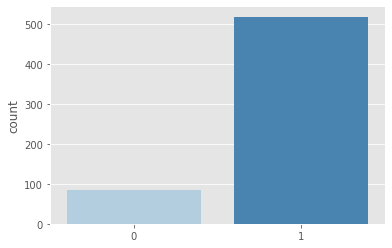

Saved
--------------------
DecisionTreeClassifier()
--------------------



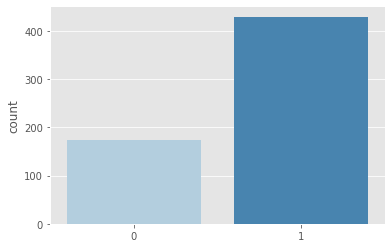

Saved
--------------------
ExtraTreeClassifier()
--------------------



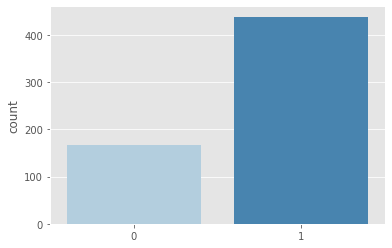

Saved
--------------------
RandomForestClassifier()
--------------------



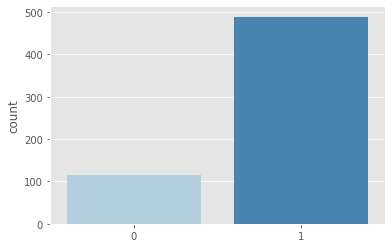

Saved
--------------------
BaggingClassifier()
--------------------



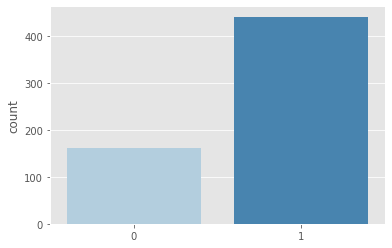

Saved
--------------------
AdaBoostClassifier()
--------------------



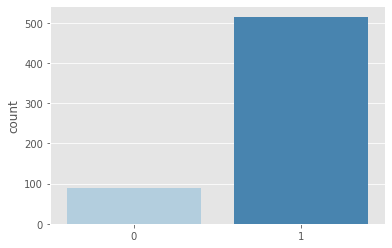

Saved
--------------------
GradientBoostingClassifier()
--------------------



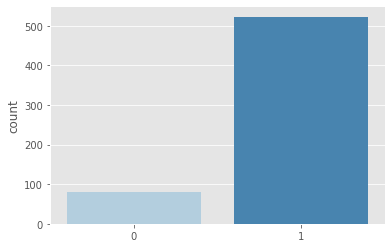

Saved
--------------------
SVC()
--------------------



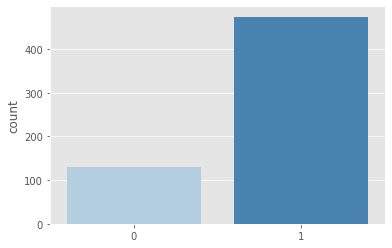

Saved
--------------------
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
--------------------



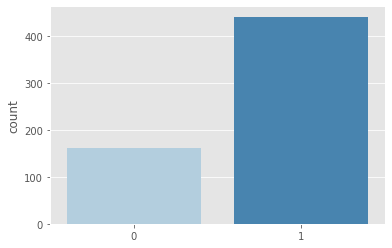

Saved
--------------------
VotingClassifier(estimators=[('RFC', RandomForestClassifier())])
--------------------



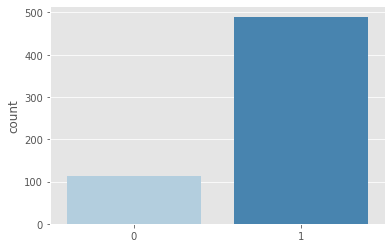

In [11]:
modelos = choose_models('all',None,clf = True)

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['text'])

for modelo in list(modelos.keys()):
    metricas,pack = baseline(X, df_train['label'], base_model = modelos[modelo], clf = True,file_name='baseline_metrics.csv')
    print(20*'-'+'\n'+f'{str(modelos[modelo])}'+'\n'+20*'-'+'\n')
    sns.countplot(x=pack['ypred'],palette='Blues');
    plt.show()

In [12]:
x=pd.read_csv(os.getcwd()+'/model/model_metrics/baseline_metrics.csv',sep=';')
x.sort_values(by='F1',ascending = False)

,model,ACC,Precision,Recall,F1,ROC,Jaccard
0,LogisticRegression,0.776490,0.784067,0.921182,0.847112,0.700490,0.734774
10,VotingClassifier,0.771523,0.773469,0.933498,0.845982,0.686446,0.733075
8,SVC,0.774834,0.784810,0.916256,0.845455,0.700552,0.732283
9,XGBClassifier,0.774834,0.805430,0.876847,0.839623,0.721252,0.723577
4,RandomForestClassifier,0.759934,0.766871,0.923645,0.837989,0.673944,0.721154
6,AdaBoostClassifier,0.750000,0.747573,0.948276,0.836048,0.645855,0.718284
7,GradientBoostingClassifier,0.746689,0.741874,0.955665,0.835307,0.636923,0.717190
1,KNeighborsClassifier,0.736755,0.737958,0.943350,0.828108,0.628241,0.706642
5,BaggingClassifier,0.745033,0.785068,0.854680,0.818396,0.687441,0.692615
3,ExtraTreeClassifier,0.731788,0.778539,0.839901,0.808057,0.675001,0.677932


/Users/mcgg/opt/miniconda3/envs/the_bridge_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


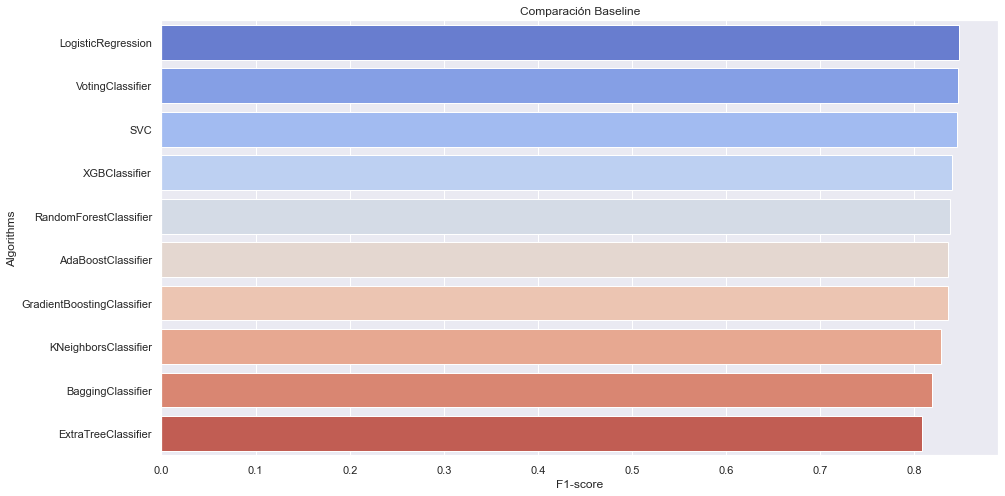

In [13]:
sns.set(rc={'figure.figsize':(15, 8)})
# Cross validate model with Kfold stratified cross val
K_fold = StratifiedKFold(n_splits=20)

saved_baseline_metrics = pd.read_csv('model/model_metrics/baseline_metrics.csv',sep=';').sort_values(by='F1',ascending=False)

cv_means = saved_baseline_metrics['F1']
cv_means = cv_means[:-1]
lista = saved_baseline_metrics['model']
lista = lista[:-1]

cv_frame = pd.DataFrame(
    {
        "CrossValMeans":cv_means.astype(float),
        "Algorithms": lista
    })

cv_plot = sns.barplot("CrossValMeans","Algorithms", data = cv_frame,palette='coolwarm')

cv_plot.set_xlabel("F1-score")
cv_plot = cv_plot.set_title("Comparación Baseline")

### Modelos modificando parametros:

In [26]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_train['text'])
y = df_train['label'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [ ]:
models_names = list(choose_models('all',params=None).keys())
#mods = models_names
mods = models_names[0]
print(mods)

models_generator(X,y,choose_models(mods,params=None),choose_params(mods),
file_name ='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score),'F1':make_scorer(f1_score)})

In [ ]:
models_names = list(choose_models('all',params=None).keys())
#mods = models_names
mods = models_names[3:5]
print(mods)
for mod in mods:  
    models_generator(X,y,choose_models(mod,params=None),choose_params(mod),
    file_name ='metrics.csv',dir_file='model/model_metrics',dir_model_file='model',scaling=False,
    scoring = { "AUC": "roc_auc","Accuracy": make_scorer(accuracy_score),'Precision': make_scorer(precision_score),'F1':make_scorer(f1_score)})

In [14]:
x=pd.read_csv(os.getcwd()+'/model/model_metrics/metrics.csv',sep=';')
x.sort_values(by='F1',ascending = False)

,model,params_tried,best_params,ACC,Precision,Recall,F1,ROC,Jaccard,model_path
0,LogisticRegression,"{'penalty': ['l2'], 'class_weight': ['none', '...","{'class_weight': 'none', 'max_iter': 50, 'pena...",0.776490,0.784067,0.921182,0.847112,0.700490,0.734774,model/LogisticRegression.pkl
4,XGBClassifier,"{'nthread': [4], 'objective': ['binary:logisti...","{'colsample_bytree': 1.0, 'learning_rate': 0.0...",0.764901,0.760870,0.948276,0.844298,0.668582,0.730550,model/XGBClassifier.pkl
5,SVC,"[{'C': [1, 10, 100, 1000], 'kernel': ['linear'...","{'C': 1, 'class_weight': 'balanced', 'kernel':...",0.788079,0.854592,0.825123,0.839599,0.768622,0.723542,model/SVC.pkl
1,KNeighborsClassifier,"{'n_neighbors': [3, 5, 7, 9, 11, 13, 15], 'wei...","{'algorithm': 'ball_tree', 'leaf_size': 20, 'n...",0.740066,0.741748,0.940887,0.829533,0.634585,0.708720,model/KNeighborsClassifier.pkl
6,LogisticRegression,"{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, ...","{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', ...",0.672185,0.672185,1.000000,0.803960,0.500000,0.672185,model/LogisticRegression_1.pkl
7,LogisticRegression,"{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, ...","{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', ...",0.672185,0.672185,1.000000,0.803960,0.500000,0.672185,model/LogisticRegression_2.pkl
3,ExtraTreeClassifier,"{'criterion': ['gini', 'entropy'], 'max_depth'...","{'class_weight': None, 'criterion': 'gini', 'm...",0.665563,0.674658,0.970443,0.795960,0.505424,0.661074,model/ExtraTreeClassifier.pkl
2,DecisionTreeClassifier,"{'criterion': ['log_loss', 'gini', 'entropy'],...","{'class_weight': 'balanced', 'criterion': 'log...",0.652318,0.750000,0.724138,0.736842,0.614594,0.583333,model/DecisionTreeClassifier.pkl


### Resultado con modelo elegido:

In [16]:
df_test = ds_test.copy()
df_test['text'] = ds_test['text'].apply(preprocess_text)


In [19]:
df_test.head()

,test_idx,text
0,0,fm receiver none
1,1,picture quality surprised first saw camera saw...
2,2,great video clip quality digital camera much b...
3,3,creative well rechargeable battery feature
4,4,highly recommend camera anyone looking good di...


In [18]:
ds_test.head()

,test_idx,text
0,0,fm receiver it has none
1,1,"the picture quality surprised me , when i firs..."
2,2,great video clip quality for a digital camera ...
3,3,creative did well on its rechargeable battery ...
4,4,i highly recommend this camera to anyone looki...


In [22]:
model_path='model/LogisticRegression.pkl'
model=pickle.load(open(model_path,'rb'))
 

In [23]:
model

LogisticRegression(class_weight='none', max_iter=50, solver='newton-cg')

In [27]:
test_X = vectorizer.transform(df_test['text'])
df_test['prediction']=model.predict(test_X) 

In [32]:
df_test.head()

,test_idx,text,prediction
0,0,fm receiver none,0
1,1,picture quality surprised first saw camera saw...,1
2,2,great video clip quality digital camera much b...,1
3,3,creative well rechargeable battery feature,1
4,4,highly recommend camera anyone looking good di...,1


In [41]:
prediction_json={'target':{str(df_test['test_idx'][i]):int(df_test['prediction'][i]) for i in range(len(df_test))}}

In [42]:
prediction_json

{'target': {'0': 0,
  '1': 1,
  '2': 1,
  '3': 1,
  '4': 1,
  '5': 0,
  '6': 1,
  '7': 1,
  '8': 1,
  '9': 1,
  '10': 0,
  '11': 0,
  '12': 1,
  '13': 1,
  '14': 1,
  '15': 1,
  '16': 0,
  '17': 0,
  '18': 1,
  '19': 0,
  '20': 1,
  '21': 1,
  '22': 1,
  '23': 1,
  '24': 1,
  '25': 1,
  '26': 1,
  '27': 1,
  '28': 1,
  '29': 1,
  '30': 0,
  '31': 1,
  '32': 1,
  '33': 1,
  '34': 0,
  '35': 1,
  '36': 1,
  '37': 1,
  '38': 1,
  '39': 0,
  '40': 0,
  '41': 0,
  '42': 0,
  '43': 0,
  '44': 1,
  '45': 1,
  '46': 1,
  '47': 1,
  '48': 0,
  '49': 1,
  '50': 0,
  '51': 0,
  '52': 1,
  '53': 1,
  '54': 0,
  '55': 0,
  '56': 1,
  '57': 0,
  '58': 1,
  '59': 0,
  '60': 0,
  '61': 1,
  '62': 0,
  '63': 1,
  '64': 0,
  '65': 1,
  '66': 1,
  '67': 1,
  '68': 1,
  '69': 1,
  '70': 1,
  '71': 1,
  '72': 1,
  '73': 0,
  '74': 1,
  '75': 1,
  '76': 1,
  '77': 0,
  '78': 1,
  '79': 1,
  '80': 1,
  '81': 0,
  '82': 1,
  '83': 0,
  '84': 1,
  '85': 1,
  '86': 1,
  '87': 1,
  '88': 1,
  '89': 1,
  '90': 1,

In [43]:
type(prediction_json)

dict

In [44]:
with open("data/processed/prediction.json", "w") as f:
    json.dump(prediction_json, f)

## OBSERVACIONES:

- Se realiza la comparación de los distintos modelos supervisados 
    - Baseline: con la métrica F1 el mejor resultado es el modelo LogisticRegression
    - Modificando hiperparámetros: coincide con el resultado de mejor modelo de la baseline
    
- Los resultados del f1-score en la web: 
  - F1-score modelo LogisticRegression = 0.70

- Se observa que el f1-score no es muy alto

- Vías de mejora: 
    - Se podría mejorar el preprocesado de los datos comparando los distintos métodos
    - Quizás un mejor ajuste de hiperparámetros 
    - Probar métodos de deep learning ([siguiente notebook](2_NLP_ModelsTransformers.ipynb))



